In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import the necessary packages

In [65]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 150)

In [66]:
def removeArtifacts(data, original):
    for col in data.select_dtypes(include='object').columns:
        data[col] = data[col].where(data[col].isin(original[col].unique()), np.nan)
# remove categorical artifacts

In [67]:
def handleOriginal(original):
    original["Depression"] = (original["Depression"] == "Yes")

In [68]:
data = pd.read_csv("original.csv")
handleOriginal(data)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [70]:
data.isna().sum().sort_values(ascending=False)

Study Satisfaction                       2054
Academic Pressure                        2054
CGPA                                     2054
Profession                                673
Work Pressure                             502
Job Satisfaction                          502
Dietary Habits                              0
Family History of Mental Illness            0
Financial Stress                            0
Work/Study Hours                            0
Have you ever had suicidal thoughts ?       0
Degree                                      0
Name                                        0
Sleep Duration                              0
Gender                                      0
Working Professional or Student             0
City                                        0
Age                                         0
Depression                                  0
dtype: int64

In [71]:
def show_missing_values(data, palette="viridis"):
    missing_values = data.isna().sum().sort_values(ascending=False)
    sns.barplot(x=missing_values.values, y=missing_values.index,palette=palette)

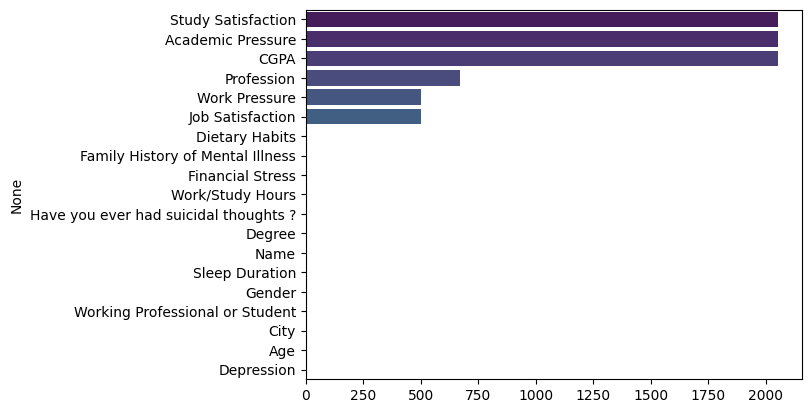

In [72]:
show_missing_values(data)

<Axes: ylabel='Count'>

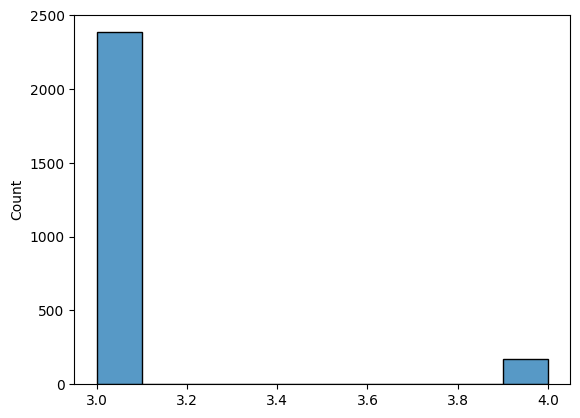

In [73]:
sns.histplot(data.isnull().sum(axis=1), bins=10)

<Axes: >

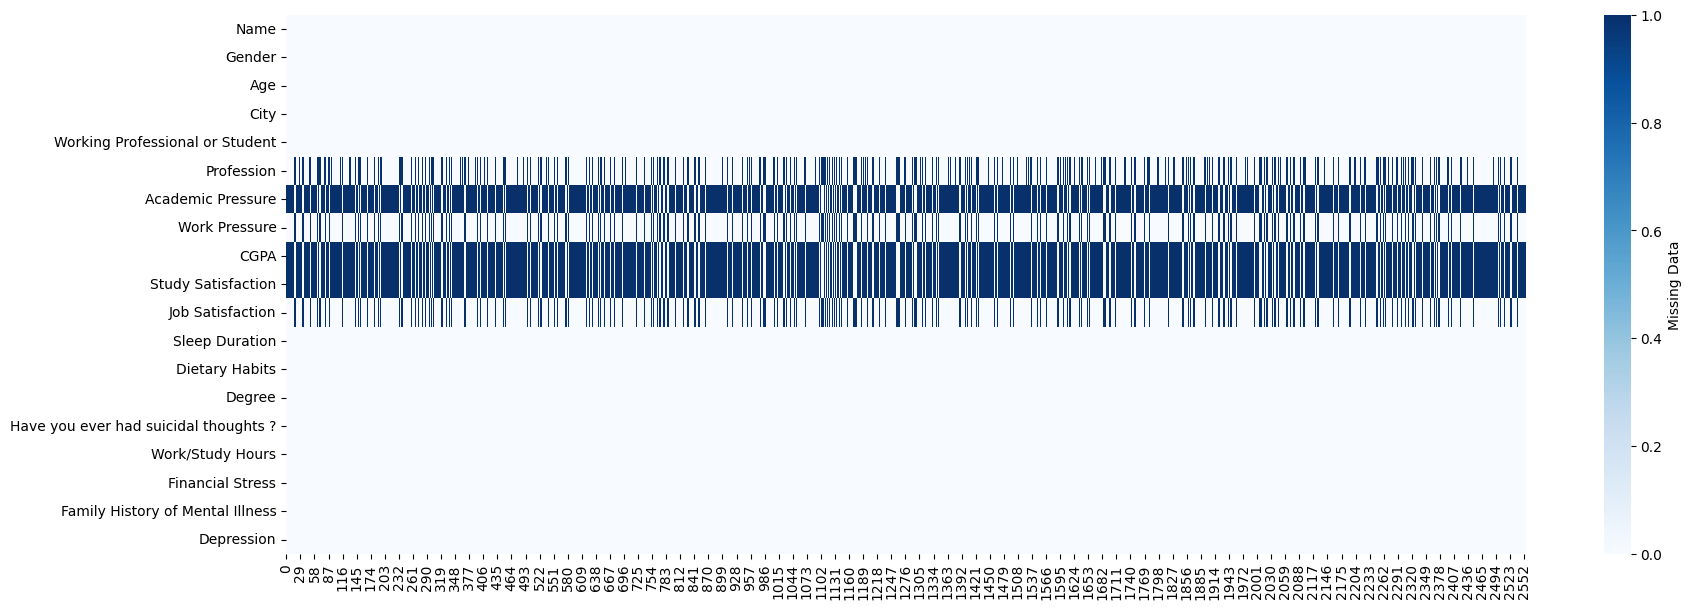

In [74]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data.isna().transpose(),cbar_kws={'label': 'Missing Data'},cmap="Blues",ax=ax)

Most missing values have 2 or more if missing value exists within the row. Likely, the columns are correlated with each other in some way.

<Axes: xlabel='Depression', ylabel='count'>

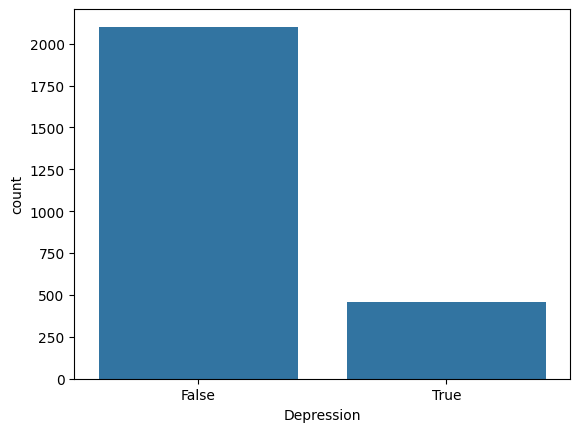

In [75]:
sns.countplot(data, x="Depression")

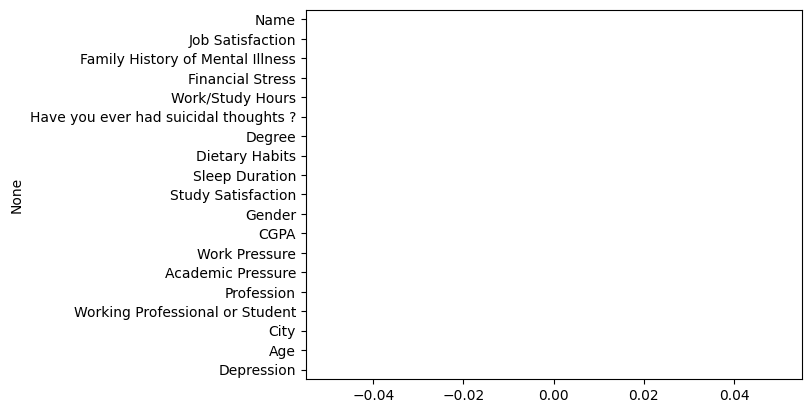

In [76]:
data = data.fillna("Unknown") # fill all with unknown
show_missing_values(data)

<Axes: xlabel='Work/Study Hours', ylabel='count'>

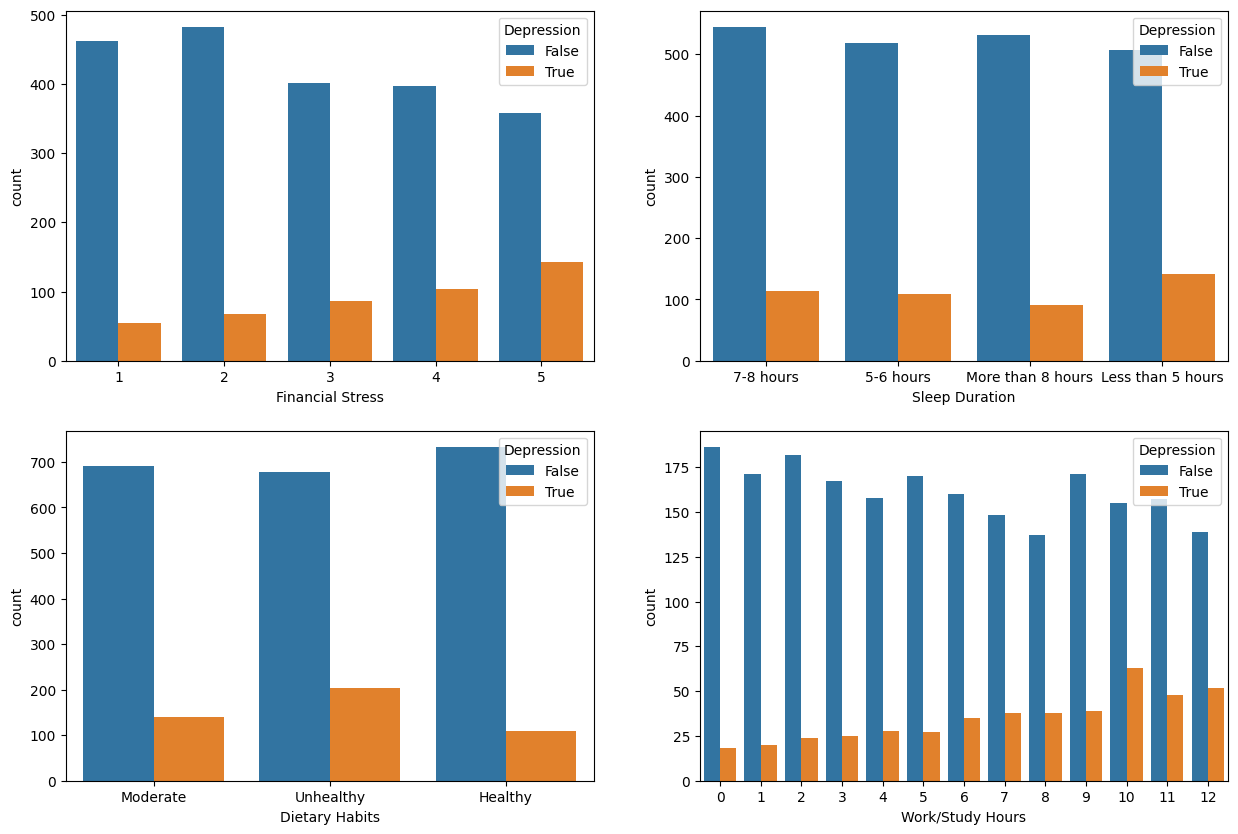

In [77]:
fig, axes=plt.subplots(ncols=2,nrows=2,figsize=(15,10))

sns.countplot(data,x="Financial Stress",hue="Depression",ax=axes[0][0])
sns.countplot(data,x="Sleep Duration",hue="Depression",ax=axes[0][1])
sns.countplot(data,x="Dietary Habits",hue="Depression",ax=axes[1][0])
sns.countplot(data,x="Work/Study Hours",hue="Depression",ax=axes[1][1])

<Axes: xlabel='Work Pressure', ylabel='count'>

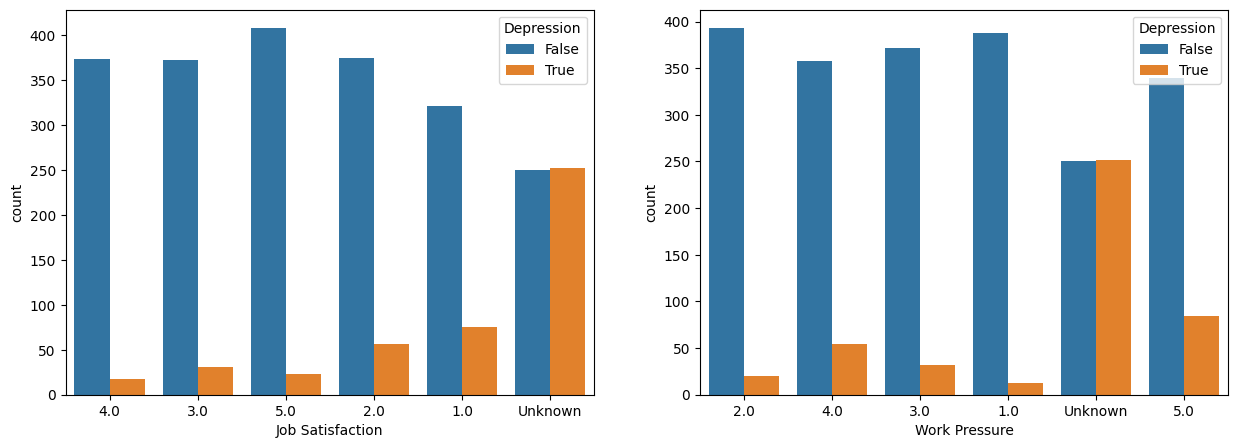

In [78]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data,x="Job Satisfaction",hue="Depression",ax=axes[0])
sns.countplot(data,x="Work Pressure",hue="Depression",ax=axes[1])

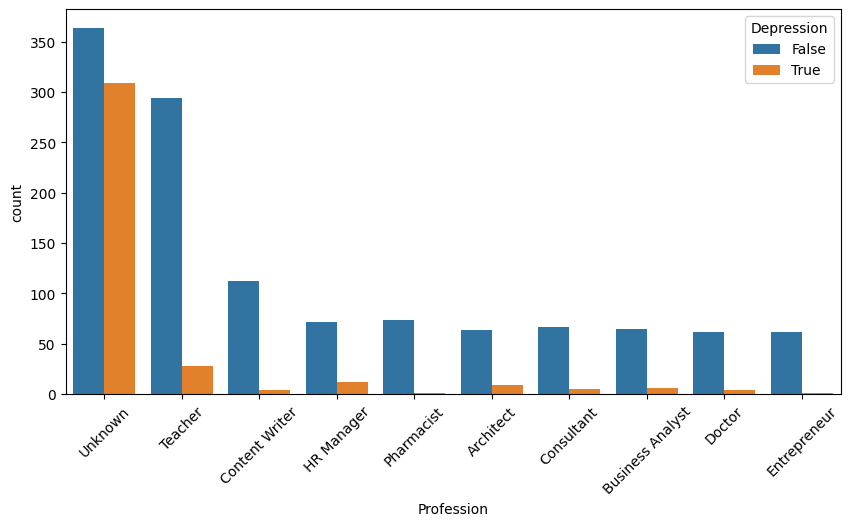

In [79]:
fig, axs = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
sns.countplot(data,x="Profession",hue="Depression",order=data["Profession"].value_counts().iloc[:10].index,ax=axs)
axs.tick_params(axis='x', rotation=45)

<Axes: xlabel='CGPA', ylabel='Count'>

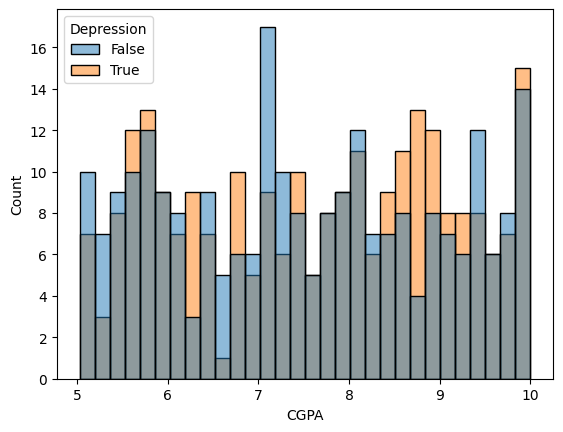

In [80]:
sns.histplot(data[data["CGPA"]!="Unknown"],x="CGPA",hue="Depression",bins=30)

<Axes: xlabel='Study Satisfaction', ylabel='count'>

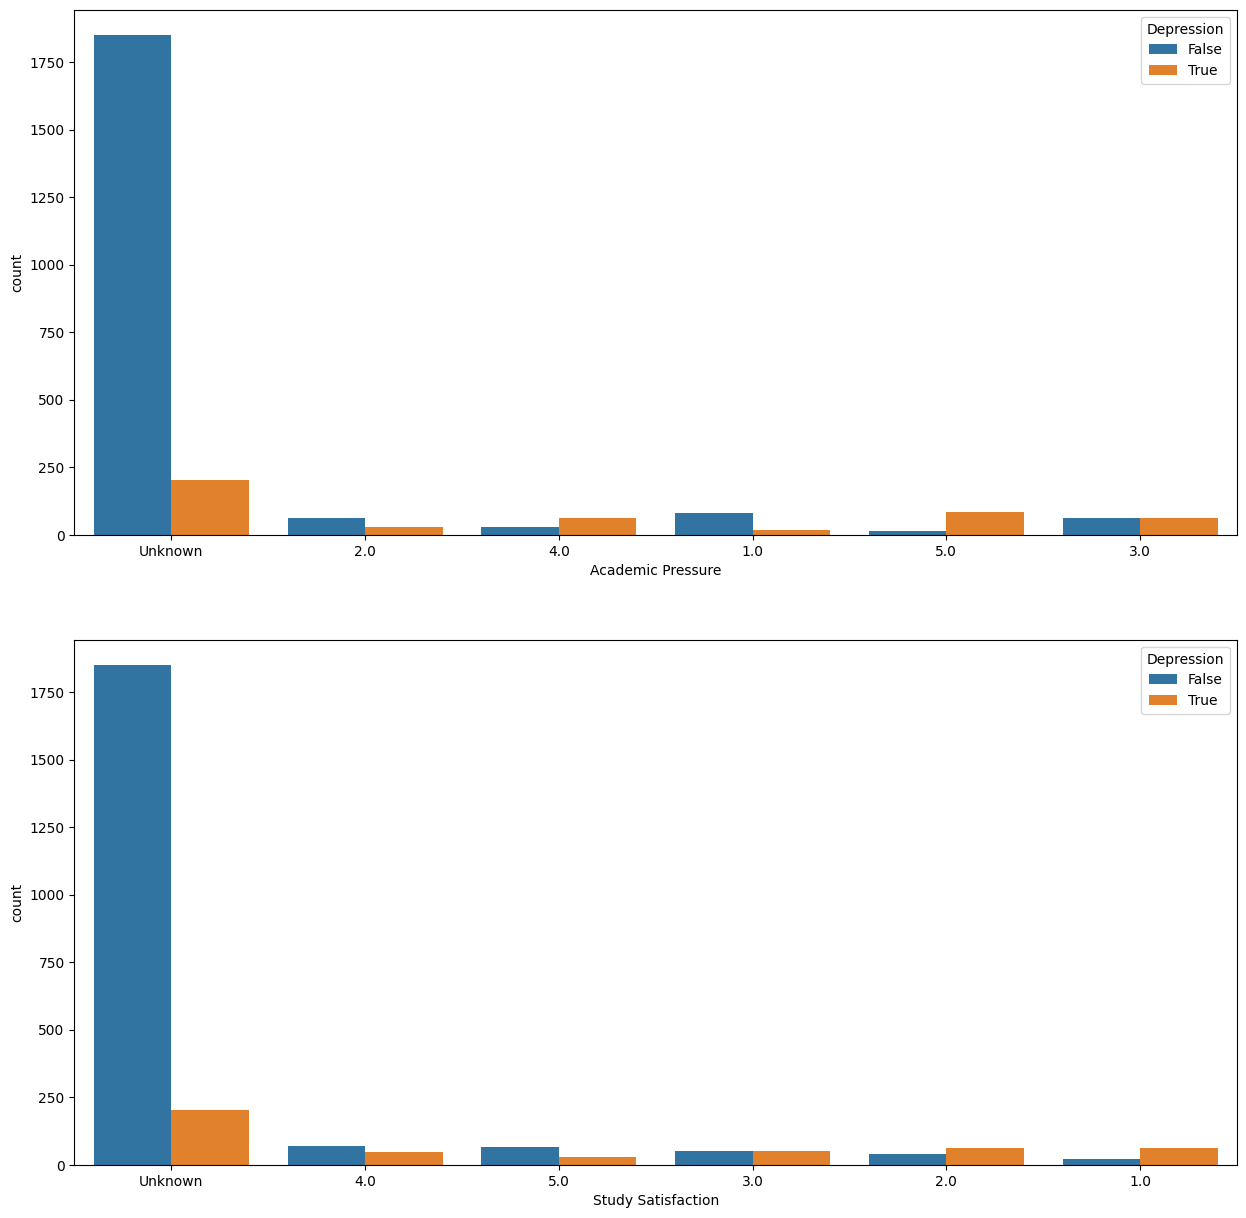

In [81]:
fig, axs = plt.subplots(ncols=1, nrows=2,figsize=(15,15))
sns.countplot(data,x="Academic Pressure",hue="Depression",ax=axs[0])
sns.countplot(data,x="Study Satisfaction",hue="Depression",ax=axs[1])

<Axes: xlabel='Work Pressure', ylabel='count'>

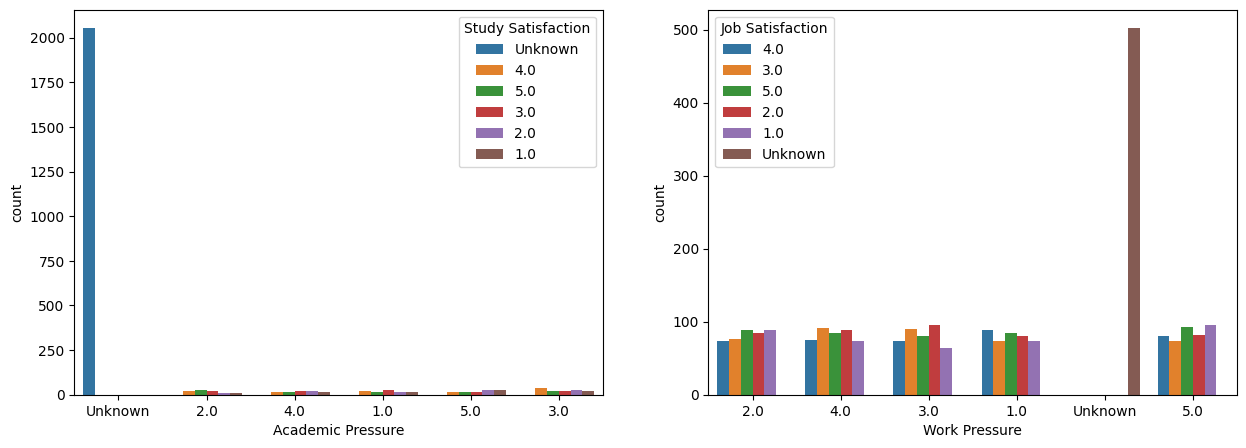

In [82]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(data,x="Academic Pressure",hue="Study Satisfaction",ax=axs[0])
sns.countplot(data,x="Work Pressure",hue="Job Satisfaction",ax=axs[1])

<Axes: xlabel='Age', ylabel='Count'>

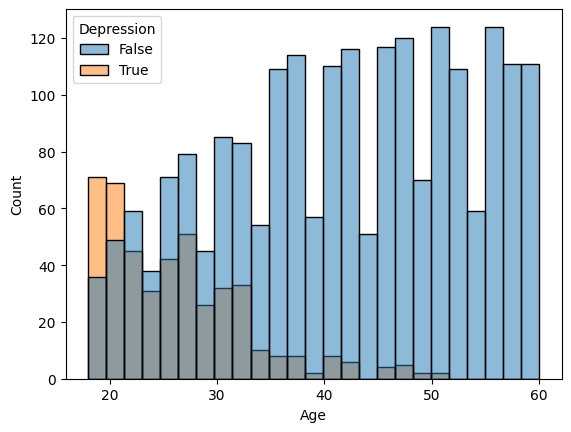

In [83]:
sns.histplot(data,x="Age",bins=25,hue="Depression")

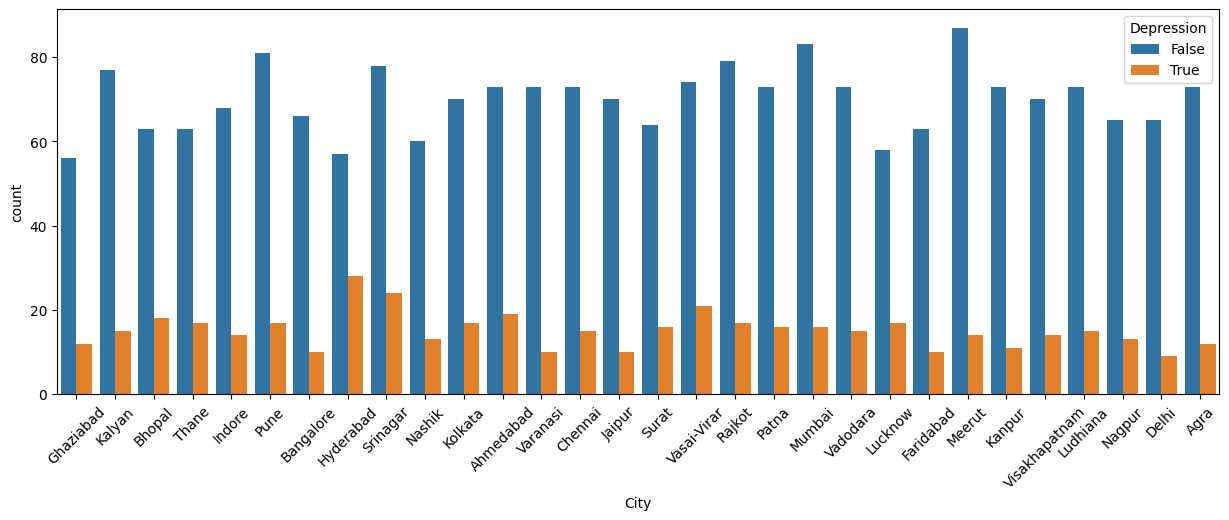

In [84]:
fig,axes=plt.subplots(figsize=(15,5))
sns.countplot(data,x="City",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)

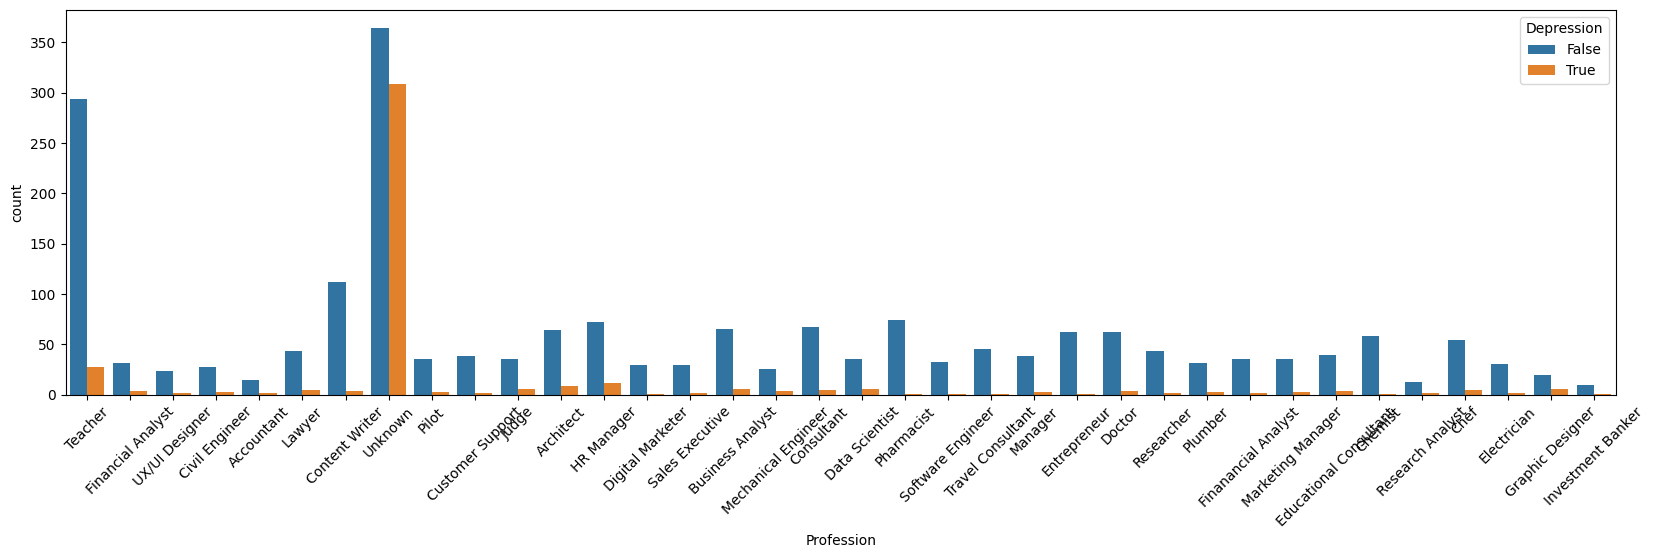

In [85]:
fig,axes=plt.subplots(figsize=(20,5))
sns.countplot(data,x="Profession",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)

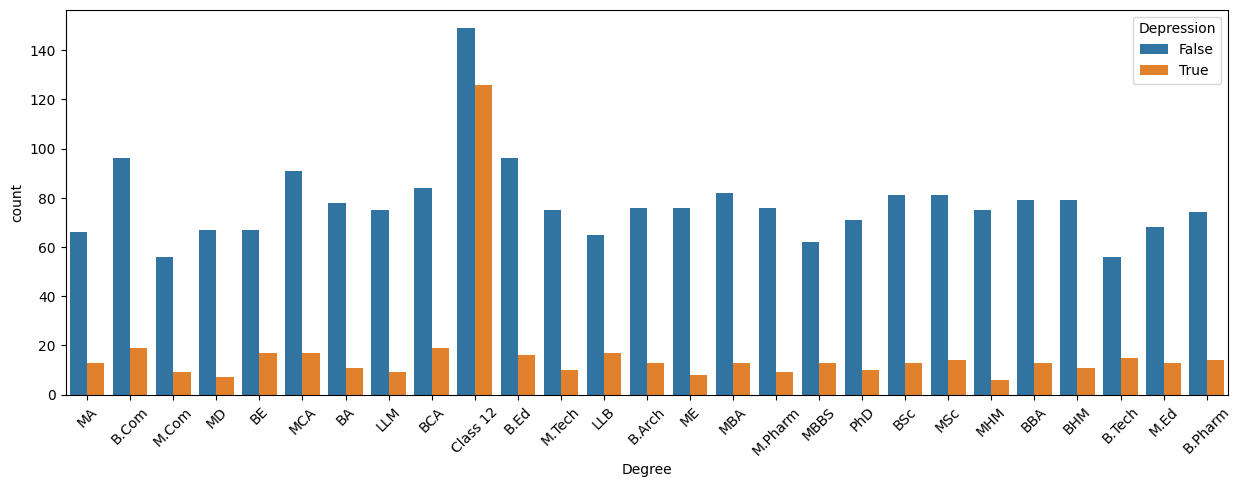

In [86]:
fig,axes=plt.subplots(figsize=(15,5))
sns.countplot(data,x="Degree",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)